# Neural networks

## Basics
Let's start by relating neural networks to regression. Consider a simple case where we have two nodes, $1$ and $X$ pointing to an outcome $Y$. What does this mean? Let's first put some context around the problem. Imagine that we want to use a subject's BMI $X$ to predict their blood pressure, $Y$. This diagram represents that.

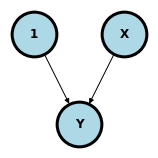

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[2, 2])
#G = nx.Graph()
G = nx.DiGraph()

G.add_node("1", pos = (0, 1) )
G.add_node("X", pos = (1, 1) )
G.add_node("Y", pos = (.5, 0))
G.add_edge("1", "Y")
G.add_edge("X", "Y")
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 1.3])
ax.set_ylim([-.3, 1.3])
plt.show()

To interpret this diagram as a neural network, consider the following rule:

:::{note}
Parent nodes that point to a child node are multiplied by weights then added together then operated on by an activation function to form the child node.
:::

If the parent nodes point to the outcome, then the nodes are combined the operated on by a known function, called the **activation function** to form a prediction. So, in this case, this is saying that the intercept (node labeled $1$)times a weight plus BMI (node labeled $X$) times a different weight get combined to form a prediction for SBP $Y$. Or, in other words

$$
\hat Y = g(w_0 \times 1 + w_1 \times X)
$$

where $g$ is a function that we specify. So in this case, if $w_0 = 120$, $w_1 = .1$ and $g$ is an idenity function, $g(a) = a$, and a subject had a BMI of 30, then the prediction would be 

$$
\hat Y = g(120 + .1 * 30) = 120.3
$$

Note $g$ is not shown in the diagram (though maybe you could with the shape of the child node) or something like that0. Also not shown in the daigram is:

+ The loss function, i.e. how to measure the different between $\hat Y$ and $Y$.
+ The way the loss function combines subjects; we have multiple BMIs and SBPs
+ How we obtain the weights, $W_0$ and $W_1$; this is done by minmizing the loss function using an algorithm

So, imagine the case where $g$ is an identity function, our loss function for different subjects is squared error and we combine different losses by adding them up. Then, our weights are obtained by minmizing

$$
\sum_{i=1}^N (Y_i - \hat Y_i)^2 
$$

and so, presuming our optimization algorithm works well, it should be idential to linear regression. 

Consider a different setting. Imagine if our $Y$ is 0 or 1 based on whether or not the subject is taking anti-hypertensive mediations. Further, let $g$ be the sigmoid function, $g(a) = 1 / \{1 + \exp(-a)\}$. Our prediction is

$$
\hat Y = \{1 + \exp(-W_0 - W_1 X)\}^{-1}
$$

which is the logistic regression prediction with intercept $W_0$ and slope $W_1$. Consider a case where
$W_0 = -4$, $W_1 = .1$ and $X=30$, then our $\hat Y = 1 / \{1 + \exp[-(-4 + .1\times 30)\}]\approx .27$. Thus, this model estimates a 27% probability that a subject with a BMI of 30 has hypertension.

Further, if we specify that the loss function is binary cross entropy

$$
- \sum_{i=1}^n \{ Y_i \log(\hat Y_i) + (1 - Y_i) \log(1 - \hat Y_i)\} / N
$$

then minmizing our loss function is identical to maximizing the likelihood for logistic regression. 

In [27]:
1 / (1 + np.exp(-(-4 + .1 * 30)))

0.2689414213699951

## More layers

Of course, there'd be no point in using NNs for problems that we can just solve with generalized linear models. NNs get better when we add more layers, since then they can discover interactions and non-linearities. Consider the following model. Notice we quit explicitly adding the bias (intercept) term / node. In general assume the bias term is included unless otherwise specified.

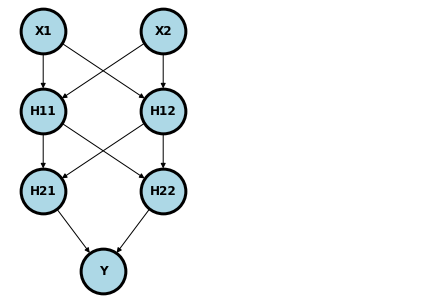

In [40]:
#plt.figure(figsize=[2, 2])
G = nx.DiGraph()

G.add_node("X1",  pos = (0, 3) )
G.add_node("X2",  pos = (1, 3) )
G.add_node("H11", pos = (0, 2) )
G.add_node("H12", pos = (1, 2) )
G.add_node("H21", pos = (0, 1) )
G.add_node("H22", pos = (1, 1) )
G.add_node("Y", pos = (.5, 0))
G.add_edges_from([ ("X1", "H11"),  ("X1", "H12"),  ("X2", "H11"),  ("X2", "H12")])
G.add_edges_from([("H11", "H21"), ("H11", "H22"), ("H12", "H21"), ("H12", "H22")])
G.add_edges_from([("H21", "Y"), ("H22", "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 3.3])
ax.set_ylim([-.3, 3.3])
plt.show()

Usually, the nodes are added in so called layers. $(X_1, X_2)$ is the input layer, $(H_{11}, H_{12})$ is the first hidden layer, $(H_{21}, H_{22})$ is the second hidden layer and $Y$ is the output layer. Imagine plugging an $X_1$ and $X_2$ into this network. It would feed forward through the network as

$$
\begin{align}
H_{11} = & g_1(W_{011} + W_{111} X_1 + W_{211} X_2) \\
H_{12} = & g_1(W_{012} + W_{112} X_1 + W_{212} X_2) \\
H_{21} = & g_2(W_{021} + W_{121} H_{11} + W_{221} H_{12}) \\
H_{22} = & g_2(W_{022} + W_{122} H_{12} + W_{222} H_{12}) \\
\hat Y = & g_3(W_{031} + W_{131} H_{21} + W_{231} H_{22})
\end{align}
$$

where $g_k$ are specified activation functions. Typically, we would have a different activation function for the output layer than the others, and the other would have the same activation function. So, for example, if $Y$ was binary, like hypertension diagnosis, then $g_1=g_2$ and $g_3$ would be a sigmoid.